<a href="https://colab.research.google.com/github/Prashanth1234545/pfsinterns/blob/main/pfsinterns_task_3_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

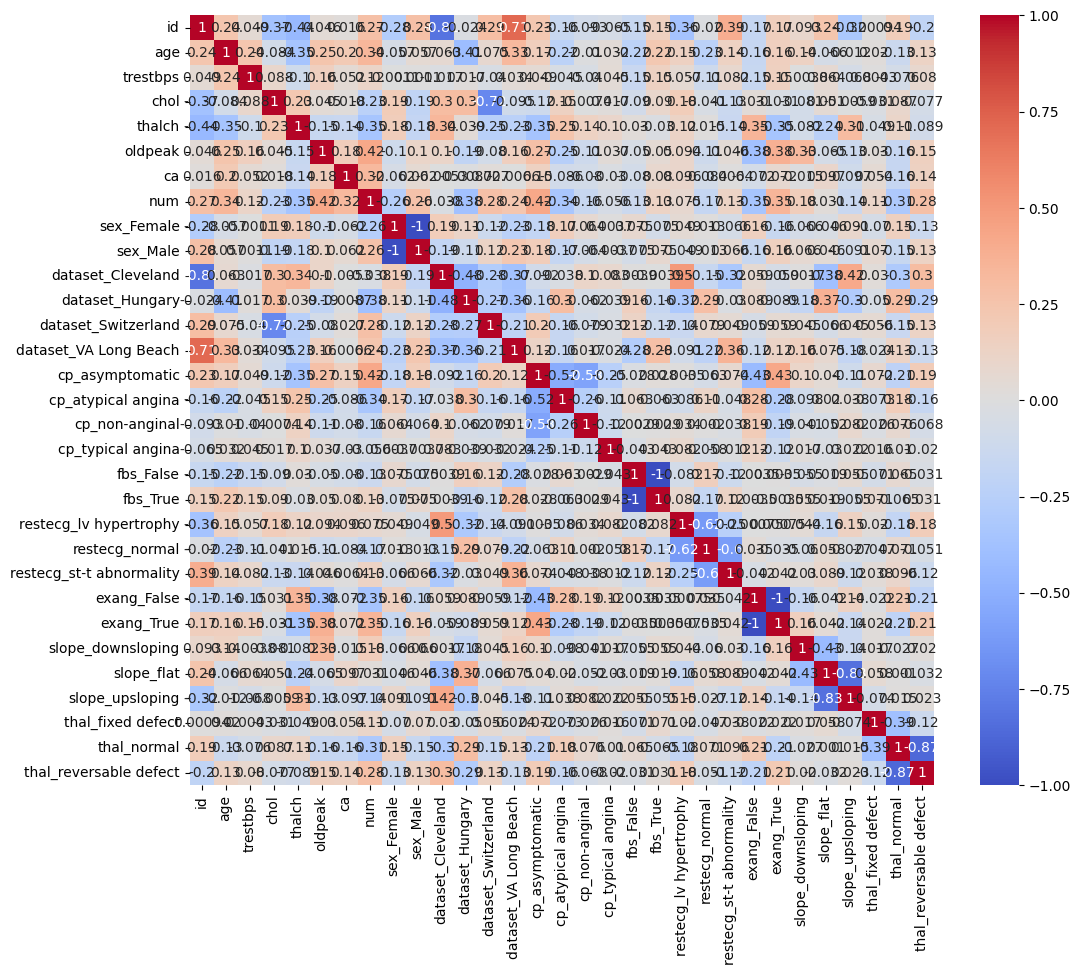

In [31]:
df = pd.read_csv('/content/archive (2).zip')

print(df.head())

print(df.info())
print(df.describe())

imputer = SimpleImputer(strategy='most_frequent')

object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = imputer.fit_transform(df[object_cols])

imputer_numeric = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

df = pd.get_dummies(df, columns=object_cols)

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [32]:
X = df.drop('ca', axis=1)
y = df['ca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

Linear Regression Model:
Mean Squared Error: 0.19137557034454974
R-squared: 0.1173301479228247


In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)

y_train_discrete = (y_train > 0.5).astype(int)

rf_model.fit(X_train_scaled, y_train_discrete)

#Scale X_test and assign it to X_test_scaled
X_test_scaled = scaler.transform(X_test)

y_test_discrete = (y_test > 0.5).astype(int)
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Classifier Report:")
print(classification_report(y_test_discrete, rf_predictions))
print(confusion_matrix(y_test_discrete, rf_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.92      0.97      0.94       149

    accuracy                           0.90       184
   macro avg       0.87      0.80      0.83       184
weighted avg       0.90      0.90      0.90       184

[[ 22  13]
 [  5 144]]


In [35]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
y_train_discrete = (y_train > 0.5).astype(int)
log_reg_model.fit(X_train_scaled, y_train_discrete)

log_reg_predictions = log_reg_model.predict(X_test_scaled)

y_test_discrete = (y_test > 0.5).astype(int)
print("Logistic Regression Report:")
print(classification_report(y_test_discrete, log_reg_predictions))
print(confusion_matrix(y_test_discrete, log_reg_predictions))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.93      0.93      0.93       149

    accuracy                           0.89       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.89      0.89      0.89       184

[[ 25  10]
 [ 10 139]]


In [36]:
def evaluate_model(predictions, y_test, model_name):
    print(f"{model_name} Report:")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

evaluate_model(rf_predictions, y_test_discrete, "Random Forest")
evaluate_model(log_reg_predictions, y_test_discrete, "Logistic Regression")

Random Forest Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.92      0.97      0.94       149

    accuracy                           0.90       184
   macro avg       0.87      0.80      0.83       184
weighted avg       0.90      0.90      0.90       184

[[ 22  13]
 [  5 144]]
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        35
           1       0.93      0.93      0.93       149

    accuracy                           0.89       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.89      0.89      0.89       184

[[ 25  10]
 [ 10 139]]


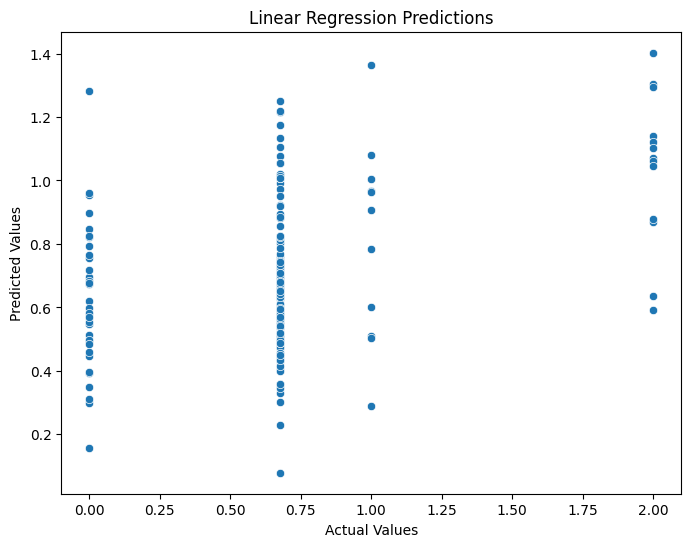

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")
plt.show()
